In [14]:
%%capture --no-stderr

UsageError: %%capture is a cell magic, but the cell body is empty.


In [15]:
from typing import TypedDict
from langgraph.graph import StateGraph , START, END
from langgraph.checkpoint.memory import MemorySaver
from IPython.display import Image, display

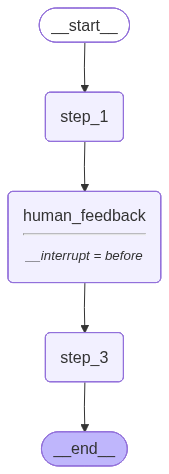

In [16]:
class State(TypedDict):
    input: str
    user_feedback: str
    
def step_1(state):
    print("---Step 1---")
    
def human_feedback(state):
    print("---Human Feedback---")
    
def step_3(state):
    print("---Step 3---")

builder = StateGraph(State)
builder.add_node("step_1", step_1)
builder.add_node("human_feedback", human_feedback)
builder.add_node("step_3", step_3)

builder.add_edge(START, "step_1")
builder.add_edge("step_1", "human_feedback")
builder.add_edge("human_feedback", "step_3")
builder.add_edge("step_3", END)

memory = MemorySaver()

graph = builder.compile(checkpointer=memory, interrupt_before=["human_feedback"])

display(Image(graph.get_graph().draw_mermaid_png()))

# %%


In [17]:
initial_input = {"input" : "hello world"}

thread = {"configurable" : {"thread_id" : 1}}

for event in graph.stream(initial_input, thread, stream_mode="values"):
    print(event)
    
print("--State before update--")
print(graph.get_state(thread).values)

{'input': 'hello world'}
---Step 1---
--State before update--
{'input': 'hello world'}


In [18]:
user_input = input("Tell me how you want to update the state : ")

graph.update_state(thread, {"user_feedback" : user_input}, as_node="human_feedback")

print("-- State after update --")
print(graph.get_state(thread).values)

graph.get_state(thread).next


-- State after update --
{'input': 'hello world', 'user_feedback': 'gg'}


('step_3',)

In [19]:
for event in graph.stream(None, thread, stream_mode="values"):
    print(event)

{'input': 'hello world', 'user_feedback': 'gg'}
---Step 3---
